# Student Loan Risk with Deep Learning, With Attempted Performance Improvements and Feature Reduction

Reduce the number of features by excluding columns that are suspected to be unrelated to the target/outcome, as well as a column that could be causing data leakage.

Number of features is reduced to 7



In [288]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [295]:
# Read the csv into a Pandas DataFrame, Review the DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

display(loans_df.head())
# Review the data types associated with the columns
display(loans_df.dtypes)

# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


,0
payment_history,float64
location_parameter,float64
stem_degree_score,float64
gpa_ranking,float64
alumni_success,float64
study_major_code,float64
time_to_completion,float64
finance_workshop_score,float64
cohort_ranking,float64
total_loan_score,float64


,count
credit_ranking,
1,855
0,744


### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [296]:
# Define target set y using credit_ranking column; display a sample of y
y = loans_df["credit_ranking"]
display(y[:5])

,credit_ranking
0,0
1,0
2,0
3,1
4,0


In [297]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns=["credit_ranking"])

# Review the features DataFrame
display(X.head())

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


'feature_importances:'

,Feature,Importance
0,total_loan_score,19.232219
1,finance_workshop_score,17.511167
2,time_to_completion,17.458657
3,stem_degree_score,12.594046
4,cohort_ranking,11.822578
5,payment_history,11.402393
6,gpa_ranking,9.978940


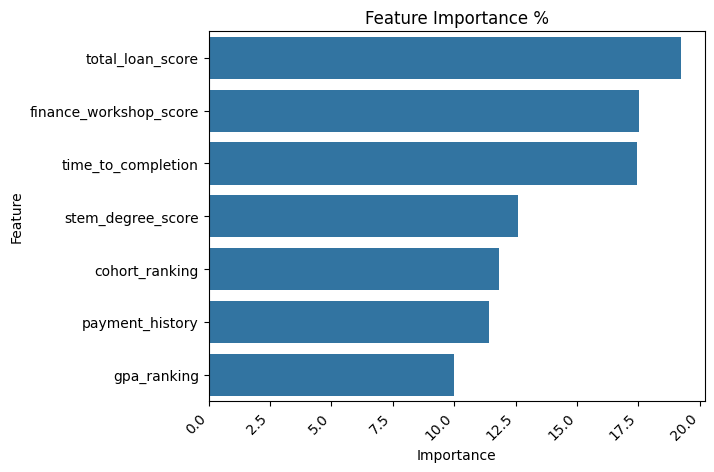

None

'Feature columns below 5%? '

,Feature


In [308]:
#reduce.
# Check Feature Importance using a RandomForest model.

# Train RandomForest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_ * 100  # get in %
feature_names = X.columns



# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.reset_index(inplace=True, drop=True)
display("feature_importances:", (feature_importances))

# Plot Seaborn bar chart of feature importance:
import seaborn as sns
import matplotlib.pyplot as plt
bar_plot = sns.barplot(data=feature_importances, x='Importance', y='Feature')
bar_plot.set_title("Feature Importance %")
# Rotate the x-axis labels
plt.xticks(rotation=45, horizontalalignment='right')


display(plt.show())


# Identify Features to drop with low importance
threshold = 5 # set at 5%
to_drop = feature_importances[feature_importances['Importance'] < threshold]['Feature']
display("Feature columns below 5%? ", to_drop)

In [299]:
#reduce.
# Drop features that are likely irrelevant
X_reduced = X.drop(columns=['location_parameter', 'alumni_success', 'study_major_code'])

# Drop features that might cause data leakage
X_reduced = X_reduced.drop(columns=['financial_aid_score'])

# reset X to the new X_reduced DF
X = X_reduced.copy()
display(X.head())

,payment_history,stem_degree_score,gpa_ranking,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score
0,7.4,0.00,1.9,34.0,0.9978,3.51,0.56
1,7.8,0.00,2.6,67.0,0.9968,3.20,0.68
2,7.8,0.04,2.3,54.0,0.9970,3.26,0.65
3,11.2,0.56,1.9,60.0,0.9980,3.16,0.58
4,7.4,0.00,1.9,34.0,0.9978,3.51,0.56


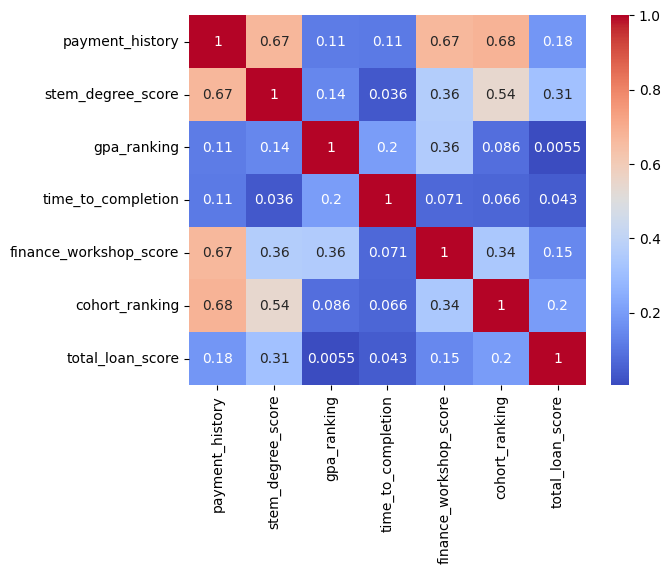

<Figure size 2000x4000 with 0 Axes>

'highly correlated data: []'

In [300]:
#reduce.
#  Look for highly correlated data;
# wab 2024.09.16
#  --> Doesn't appear to be any data to drop due to correlation.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = X.corr().abs()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(40)
plt.show()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
display(f'highly correlated data: {high_corr}')

# df.drop(columns=to_drop, inplace=True)

### Step 3: Split the features and target sets into training and testing datasets.


In [301]:
# drop(columns=["credit_ranking", 'location_parameter', 'alumni_success', 'study_major_code', 'financial_aid_score'])
display(X.head())
display(y[:5], y.value_counts())

,payment_history,stem_degree_score,gpa_ranking,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score
0,7.4,0.00,1.9,34.0,0.9978,3.51,0.56
1,7.8,0.00,2.6,67.0,0.9968,3.20,0.68
2,7.8,0.04,2.3,54.0,0.9970,3.26,0.65
3,11.2,0.56,1.9,60.0,0.9980,3.16,0.58
4,7.4,0.00,1.9,34.0,0.9978,3.51,0.56


,credit_ranking
0,0
1,0
2,0
3,1
4,0


,count
credit_ranking,
1,855
0,744


In [302]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [303]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit/train the scaler to the features training dataset
scaler.fit(X_train)

# Scale the X train and X test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [205]:
##############################
#  NOT USED
##############################

# Spot check with Random Forest model:
# Quick check shows training score of 1.0: highly overfit?

# Train the Random Forest model
clf = RandomForestClassifier(random_state=1,
				n_estimators=500).fit(X_train_scaled, y_train)
# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.805


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [304]:
# Define the the number of inputs (features) to the model
feature_count = len(X.columns)
display(feature_count)

# Review the number of features
print("number of features: " , feature_count)

7

number of features:  7


In [305]:
# Define the model:
# + number of neurons/hidden nodes for the hidden layers
hidden_nodes_layer_1 = 32 # up from 10
hidden_nodes_layer_2 = 16 # up from 5
neurons_output_layer = 1

# Create the Keras Sequential model instance, add layers (layer one includes input layer)
nn_model = Sequential()
nn_model.add(Dense(units=hidden_nodes_layer_1, activation="relu", input_dim = feature_count))
nn_model.add(Dense(units=hidden_nodes_layer_2, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Display the Sequential model summary/Check the structure of the model
nn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                     │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [306]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [307]:
# Fit/Train the model using 100 epochs and the training data
# The epoch runs are all Training...see these accuracy values for overfit tendencies
# Save a model_fit History object to graph below and see trends of accuracy and loss over the Epochs.

# nn_model.fit(X_train_scaled, y_train, epochs=100) #, validation_split=0.2)

# Use for plotting Epochs vs. Loss, Accuracy below
model_fit_history = nn_model.fit(X_train_scaled, y_train, epochs=200) #, validation_split=0.2)

# wab 2024.09.15 originally tried 50, then 100 epochs, but determined from Graph that 25 was more optimal.

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5645 - loss: 0.6831
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6311 - loss: 0.6469
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6923 - loss: 0.5972
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6957 - loss: 0.5914
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6800 - loss: 0.5797
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6974 - loss: 0.5803
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.5534
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 0.5574
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7331 - loss: 0.5248
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7157 - loss: 0.5429
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7230 - loss: 0.5366
Epoch 12/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [309]:
# Evaluate the model using the test data:
# Determine model loss and accuracy metrics using the evaluate method on the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled , y_test, verbose=2)

# Display evaluation results (model loss and accuracy):
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - 13ms/step - accuracy: 0.7550 - loss: 0.5424
Loss: 0.5423898696899414, Accuracy: 0.7549999952316284


,accuracy,loss
1,0.602169,0.670197
2,0.659716,0.631539
3,0.674729,0.606787
4,0.679733,0.590140
5,0.683903,0.575343


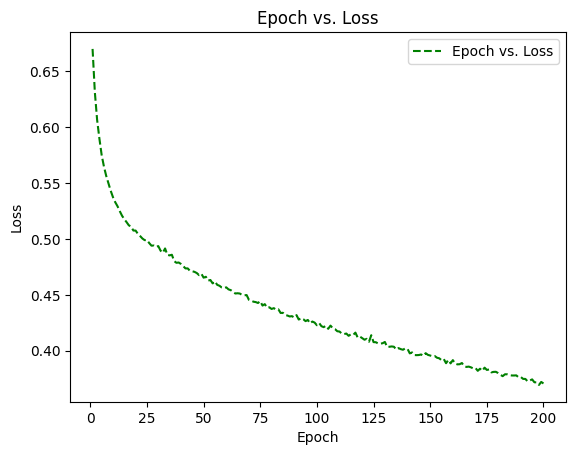

None

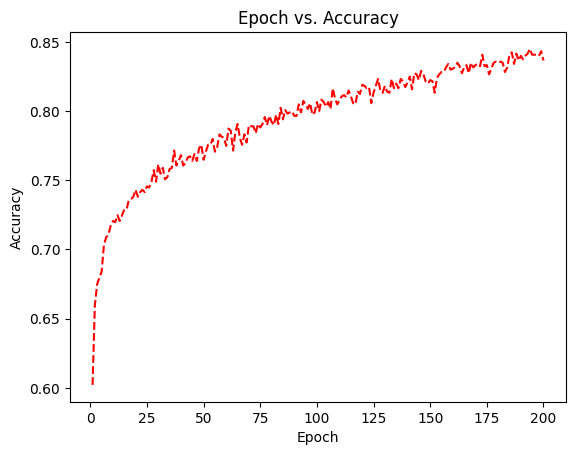

None

In [310]:
##############################
#  Use only for plotting
##############################



# Create a DataFrame of the model_fit_history and plot
# Epochs vs. the Accuracy and Loss to see where it planes out.

# Create a DataFrame containing training history
history_df = pd.DataFrame(model_fit_history.history)
# Increase the index by 1 to match the number of epochs
history_df.index += 1
# Inspect history df
display(history_df.head())

import matplotlib.pyplot as plt
# Plot the loss
plt.plot(history_df.index, history_df['loss'], label='Epoch vs. Loss', color='g', linestyle='--')
plt.title('Epoch vs. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
display(plt.show())

# simple dataframe plot:
# history_df.plot(y="loss")

# Plot the accuracy
plt.plot(history_df.index, history_df['accuracy'], label='Epoch vs. Accuracy', color='r', linestyle='--')
plt.title('Epoch vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
display(plt.show())

# simple dataframe plot:
# history_df.plot(y="accuracy")

In [311]:
##############################
#  Use only for K-Means checks
##############################

#reduce.  #perform.

# K-Fold Cross-Validation: Use cross-validation to ensure model generalizes well to unseen data

from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the model creation function
def create_model():
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim=feature_count))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

# Define the K-Fold Cross-Validator
kfold = KFold(n_splits=5, shuffle=True, random_state=13)

# Evaluate the model using K-Fold Cross-Validation
results = cross_val_score(model, X_train_scaled, y_train, cv=kfold)
print(f"Cross-Validation Accuracy: {results.mean()} (+/- {results.std()})")

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Cross-Validation Accuracy: 0.7364574616457462 (+/- 0.023366325241554856)


In [167]:
# Cross-Validation Accuracy: 0.7364574616457462 (+/- 0.023366325241554856)

In [321]:
# RE-Fit/Train the model using 100 epochs (intially) and the training data

# The epoch runs are all Training...see these accuracy values for overfit tendencies
nn_model.fit(X_train_scaled, y_train, epochs=200) #perform, validation_split=0.2

#perform
# wab/2024.09.15 originally tried 50, then 200. determined from Graph that ~100 was more optimal

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8753 - loss: 0.3153
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8648 - loss: 0.3336
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8624 - loss: 0.3300
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8724 - loss: 0.3254
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8658 - loss: 0.3274
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8618 - loss: 0.3328
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8631 - loss: 0.3181
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8783 - loss: 0.3136
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8621 - loss: 0.3317
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8586 - loss: 0.3196
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8664 - loss: 0.3152
Epoch 12/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [322]:
# Evaluate the model using the test data:
# Determine model loss and accuracy metrics using the evaluate method on the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled , y_test, verbose=2)

# Display evaluation results (model loss and accuracy):
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - 3ms/step - accuracy: 0.7850 - loss: 0.5954
Loss: 0.5953590869903564, Accuracy: 0.7850000262260437


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [325]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')#  , force_remount=True

# List the contents of My Drive
print(os.listdir('/content/drive/My Drive/saved_models'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['student_loans.keras', 'student_loans_perf.keras', 'student_loans_reduce.keras']


In [326]:
from pathlib import Path
# Set the model's file path
file_path = Path('/content/drive/My Drive/saved_models/student_loans_reduce.keras')

# Export your model to a keras file
nn_model.save(file_path)
print(os.listdir('/content/drive/My Drive/saved_models'))

['student_loans.keras', 'student_loans_perf.keras', 'student_loans_reduce.keras']


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [327]:
# Import the required libraries
import tensorflow as tf

print(os.listdir('/content/drive/My Drive/saved_models'))
# Set the model's file path
file_path = Path('/content/drive/My Drive/saved_models/student_loans_reduce.keras')

# Load the model to a new object
nn_imported = tf.keras.models.load_model(file_path)

['student_loans.keras', 'student_loans_perf.keras', 'student_loans_reduce.keras']


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [328]:
# Make predictions with the X test scaled data
# predictions = nn_model.predict(X_test_scaled,  verbose=2)
predictions = nn_imported.predict(X_test_scaled, verbose=2)

# Display a sample of the predictions
predictions[:10]

13/13 - 0s - 9ms/step


array([[0.6265243 ],
       [0.32573977],
       [0.02161383],
       [0.5246945 ],
       [0.5521539 ],
       [0.39766917],
       [0.18611394],
       [0.9994865 ],
       [0.01367298],
       [0.4924953 ]], dtype=float32)

In [329]:
# Save the predictions to a DataFrame and round the predictions to binary results
df_preds = pd.DataFrame(predictions, columns=['Prediction']) #convert numpy array to DataFrame.
df_preds_binary = df_preds.map(lambda x: 1 if x > 0.5 else 0)

display(df_preds_binary.value_counts())
display(df_preds_binary.head())
display(df_preds_binary.tail())

,count
Prediction,
1,204
0,196


,Prediction
0,1
1,0
2,0
3,1
4,1


,Prediction
395,0
396,1
397,1
398,1
399,1


### Step 4: Display a classification report with the y test data and predictions

In [330]:
# Print the classification report with the y test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, df_preds_binary))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       194
           1       0.79      0.79      0.79       206

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400



In [ ]:
# #############################################################
#  --> Description of 'reduce' model:----------------------------------
# student_loans_with_deep_learning_reduced.ipynb
# with previously added performance improvements:
#   -increased neuons of 1st and 2nd layers to 100/50
#   -reduced Epochs to 25, which appeared to be plateau for Accuracy/Loss
# + performing feature reduction
#   -remove unrelated columns
#   -removed data leak suspected column

#  --> Evaluation of 'reduce' model:----------------------------------

# The model performs well overall.  Overall accuracy of 79%
# Model performs similarly for both classes, with slightly better recall for class 1.
# Model is well-balanced (194 instances of Class 0, 206 instances of Class 1)
# and performs consistently across both classes

# NOTE: class 0 : bad credit risk; class 1: good credit risk


#  --> Details ------------------------------------------------
# Precision (predicted true results were actually true)
    # Class 0: 78% of the instances predicted as class 0 are actually class 0.
    # Class 1: 79%

# Recall/Sensitivity (actually true data points were identified correctly):
    # Class 0: model correctly identifies 78% of the actual class instances
    # Class 1: 79%
# F1-Score:
# balances sensitivity/recall and precision; harmonic mean of precision and recall
    # class 0: 0.78
    # class 1: 0.79

#  --> Data ------------------------------------------------
# 13/13 - 0s - 3ms/step - accuracy: 0.7850 - loss: 0.5954
# Loss: 0.5953590869903564, Accuracy: 0.7850000262260437

#               precision    recall  f1-score   support

#            0       0.78      0.78      0.78       194
#            1       0.79      0.79      0.79       206

#     accuracy                           0.79       400
#    macro avg       0.78      0.78      0.78       400
# weighted avg       0.79      0.79      0.79       400


# Training accuracy was 90.37% (model correctly predicts the training data),
# as seen in output in final Epoch of the Train/Fit of the model:
# Epoch 200/200
# 38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9037 - loss: 0.2567

# #############################################################
# NOTES: reading Accuracy scores
    # Accuracy:  all the things you got right over everything
    # Sensitivity/Recall: how many actually true data points were identified correctly.
    # Specificity: how many actually false data points were identified correctly
    # Precision: how many predicted true results were actually true
    # F1 score balances sensitivity/recall and precision


---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:


1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

Briefly answer the following questions in the space provided:


1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

The features used in this model include:
'payment_history', 'location_parameter', 'stem_degree_score',
'gpa_ranking', 'alumni_success', 'study_major_code', 'time_to_completion',
'finance_workshop_score', 'cohort_ranking', 'total_loan_score', 'financial_aid_score'

So, from each candidate/student, would need their history of payments (of other loans), their address/location, their grades, ranking, major, time to complete their major, scores from the finance workshop, ranking in their cohort, financial aid scores (from the university?) and total loan score for any other loans taken.


2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.


Content-based filtering leverages the attributes of each candidate to make recommendations.  We have this data: grades, major, financial score.

Context-based filtering considers the context in which the recommendation is made.  We have data such as location and history of payments.

Collaborative filtering is based on user interactions or preferences; we don't have that data available.

Our recommendation model would be a hybrid of content and context-based filtering.  Content-based can help build a profile; context-based filtering- can be used to customize recommendations based on the user's context.


3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

1) Most of this data is highly sensitive: financial, grades, location, etc.  Use of the data would require consent and would have to be handled/maintained  carefully.
2) Financial aid applications might contain information about race/gender, which would be sensitive information to use to determine if a loan will be granted.  Using attribues like race/gender, and even major and financial aid might insert biases into the recommendation engine.






**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**



In [ ]:
# NOTES for README:

# Create a deep neural network using Tensorflow's Keras model to predict student loan repayment
# CSV file contains information about previous student loan recipients

#   * Prepare the data for use on a neural network model.
#   * Compile and evaluate a model using a neural network.
#   * Predict loan repayment success with the neural network model
#   * Discuss recommendation system for student loans

# Prepare the data, including splitting and scaling.  The target dataset: “credit_ranking” column

    #   Define, create and compile the Neural Network model.
    #   Define the the number of inputs (features) to the model
    #   Define the number of neurons/hidden nodes
    #   Create the Keras Sequential model instance
    #   Add input layers and output layer
    #   Display the Sequential model summary and inspect the structure of the model
    #   Compile the Sequential model
    #   Fit the model using 50 epochs and the training data


    # Student Loan Risk with Deep Learning, With Attempted Performance Improvements and Feature Reduction

# Reduce the number of features by excluding columns that are suspected to be
# unrelated to the target/outcome, as well as a column that could be causing data leakage.

# Number of features is reduced to 7



In [ ]:
#reduce.

# #######################
#   NOT USED
# #######################

# use SHAP (SHapley Additive exPlanations) to determine importance of each feature
#   for the Neural Network;
# compare against earlier calculated RandomForest feature importance

import shap

# # Train the model
# nn_model.fit(X_train_scaled, y_train, epochs=50, verbose=0)

# Using shap.sample randomly samples K background data points.
# Quick and simple way to reduce the number of background samples.
# background = shap.sample(X_train_scaled, K=100)  # Sample 100 background data points

# Using shap.kmeans uses K-means clustering to summarize the background data into K clusters.
# More sophisticated approach that captures the diversity of the background data through clustering.
background = shap.kmeans(X_train_scaled, k=10)  # Summarize background data into 10 clusters

# Create a SHAP explainer
# Replace X_train_scaled with background to use approximations
explainer = shap.KernelExplainer(nn_model.predict, background) # background X_train_scaled

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_scaled)

# Plot the SHAP values
plt.figure(figsize=(12, 8))  # Increase the plot size
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_size=(12, 8), show=False)
# shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

plt.title("SHAP Summary Plot", fontsize=16)  # Increase title font size
plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=14)  # Increase x-axis label font size
plt.ylabel("Feature", fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size

# WARNING:  shap:  Using 1199 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples

In [ ]:
# Plot the SHAP values
plt.figure(figsize=(12, 8))  # Increase the plot size
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_size=(12, 8), show=False)
# shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

plt.title("SHAP Summary Plot", fontsize=16)  # Increase title font size
plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=14)  # Increase x-axis label font size
plt.ylabel("Feature", fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size